In [1]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install -U spacy

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import sklearn
import re
import string 
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
import seaborn as sns 


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin



In [6]:
from wordcloud import wordcloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [7]:
df=pd.read_csv('fake_job_postings.csv')

In [8]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
df.shape

(17880, 18)

# Check The Null Values

In [10]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

# Drop the Column in our Dataset

In [11]:
columns=['telecommuting','has_company_logo','has_questions','salary_range','employment_type']
for colu in columns:
    del df[colu]

In [12]:
df.head()

,job_id,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [13]:
df.fillna('',inplace=True)

# Number of Fraudulent and Non Fraudulent Jobs

<function matplotlib.pyplot.show(close=None, block=None)>

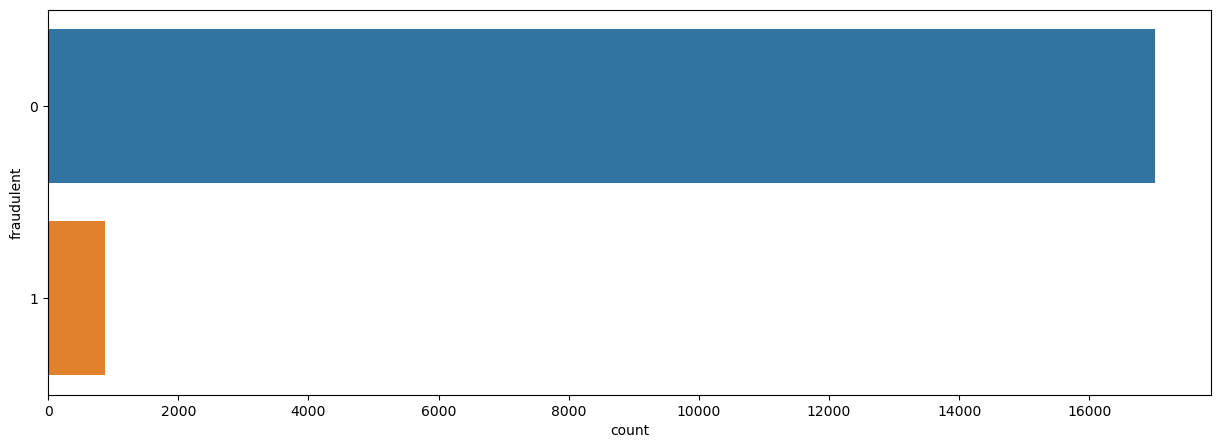

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent',data=df)
plt.show

# Exact Count Number of Fraudulent and Non Fraudulent Jobs

In [15]:
df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [16]:
exp = df['required_experience'].value_counts().to_dict()
del exp['']


In [17]:
exp

{'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

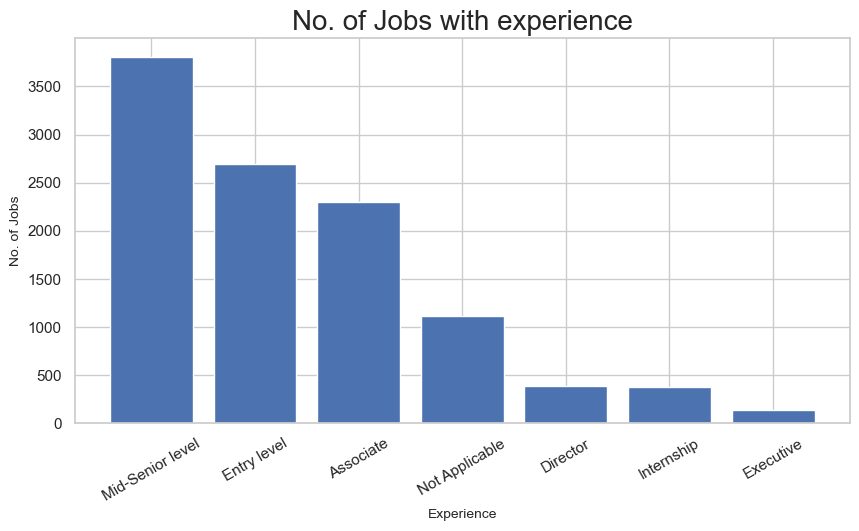

In [18]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
plt.bar(exp.keys(),exp.values())
plt.title('No. of Jobs with experience',size=20)
plt.xlabel('Experience',size=10)
plt.ylabel('No. of Jobs',size=10)
plt.xticks(rotation=30)
plt.show()

# No. of Jobs Posted based on country

In [19]:
def split(location):
    l = location.split(',')
    return l[0]
df['country']= df.location.apply(split)

In [20]:
df.head()

,job_id,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,1,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


# The Number of Jobs Posted for the top 14 Countries

In [21]:
countr=dict(df.country.value_counts()[:14])
del countr['']
countr

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127,
 'BE': 117,
 'IE': 114,
 'SG': 80}

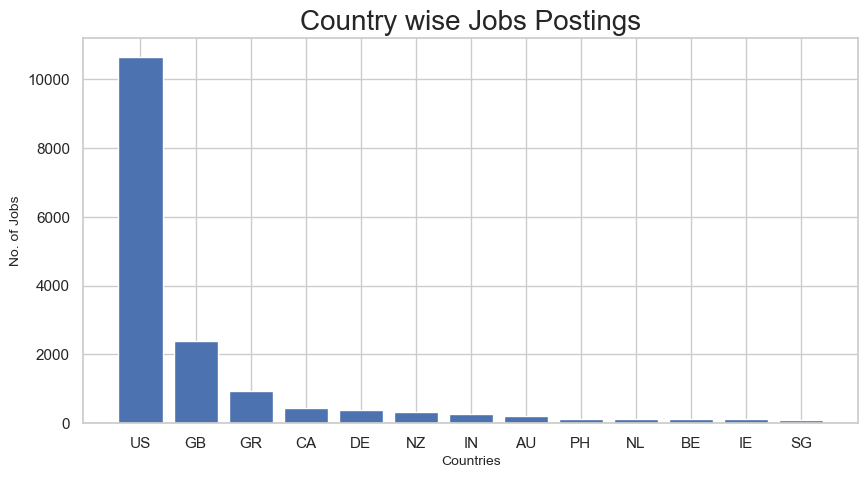

In [22]:
plt.figure(figsize=(10,5))
plt.title('Country wise Jobs Postings',size=20)
plt.bar(countr.keys(), countr.values())
plt.ylabel('No. of Jobs',size=10)
plt.xlabel('Countries',size=10)
plt.show()

# Education Level The Number of Jobs Posted for that each Education level

In [23]:
edu=dict(df.required_education.value_counts()[:8])
del edu['']
edu

{"Bachelor's Degree": 5145,
 'High School or equivalent': 2080,
 'Unspecified': 1397,
 "Master's Degree": 416,
 'Associate Degree': 274,
 'Certification': 170,
 'Some College Coursework Completed': 102}

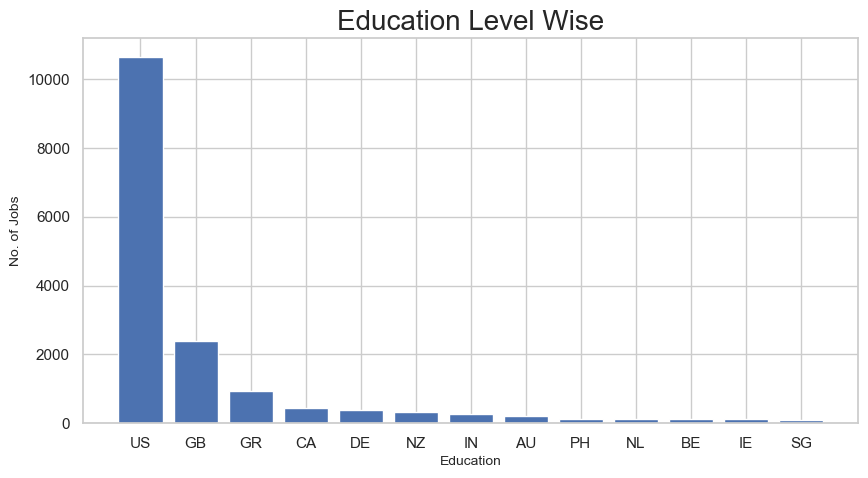

In [24]:
plt.figure(figsize=(10,5))
plt.title('Education Level Wise',size=20)
plt.bar(countr.keys(), countr.values())
plt.ylabel('No. of Jobs',size=10)
plt.xlabel('Education',size=10)
plt.show()

# Most Commonly Use Top 8  Title which was not Fradulent

In [25]:
print(df[df['fraudulent'] == 0]['title'].value_counts()[:8])


title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Name: count, dtype: int64


# Most Commonly Use Top 8  Title which was Fradulent

In [26]:
print(df[df['fraudulent'] == 1]['title'].value_counts()[:8])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Name: count, dtype: int64


In [27]:
df['text'] = df["title"] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['country']


In [28]:
df.head()

,job_id,fraudulent,text
0,1,0,"Marketing Intern We're Food52, and we've creat..."
1,2,0,Customer Service - Cloud Video Production 90 S...
2,3,0,Commissioning Machinery Assistant (CMA) Valor ...
3,4,0,Account Executive - Washington DC Our passion ...
4,5,0,Bill Review Manager SpotSource Solutions LLC i...


In [29]:
fraudjobs_text = df[df.fraudulent==1].text
realjobs_text = df[df.fraudulent==0].text

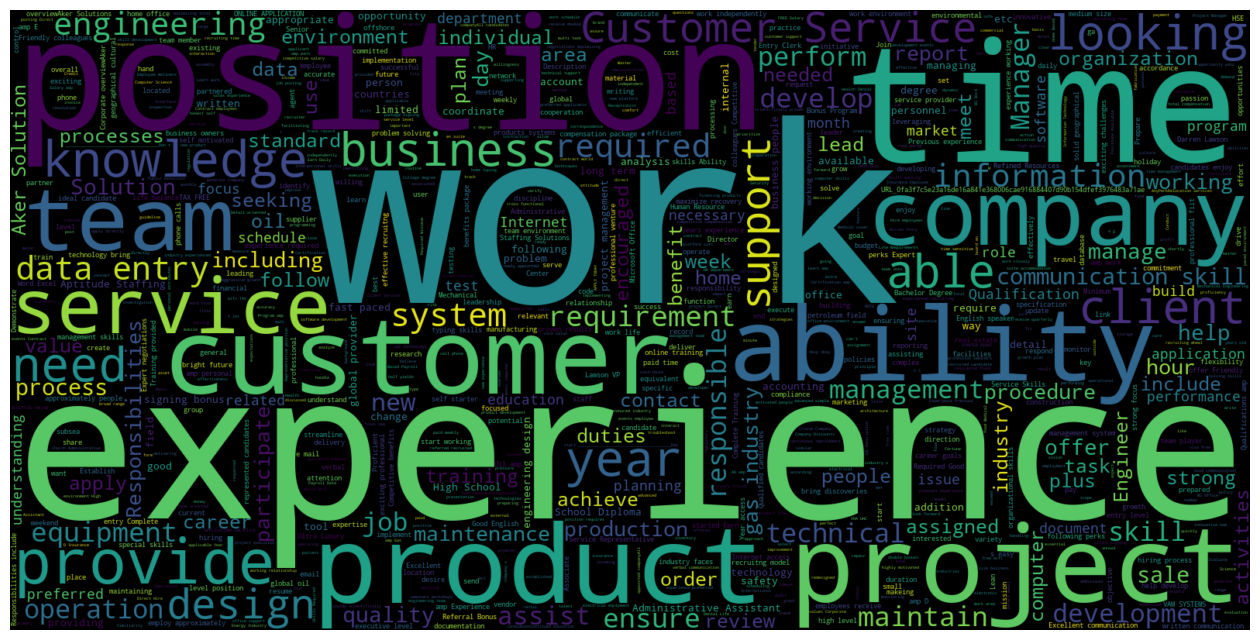

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

plt.figure(figsize=(16, 15))
wc = WordCloud(min_font_size=3, max_words=3000, width=1600, height=800, stopwords=STOPWORDS).generate(" ".join(fraudjobs_text))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


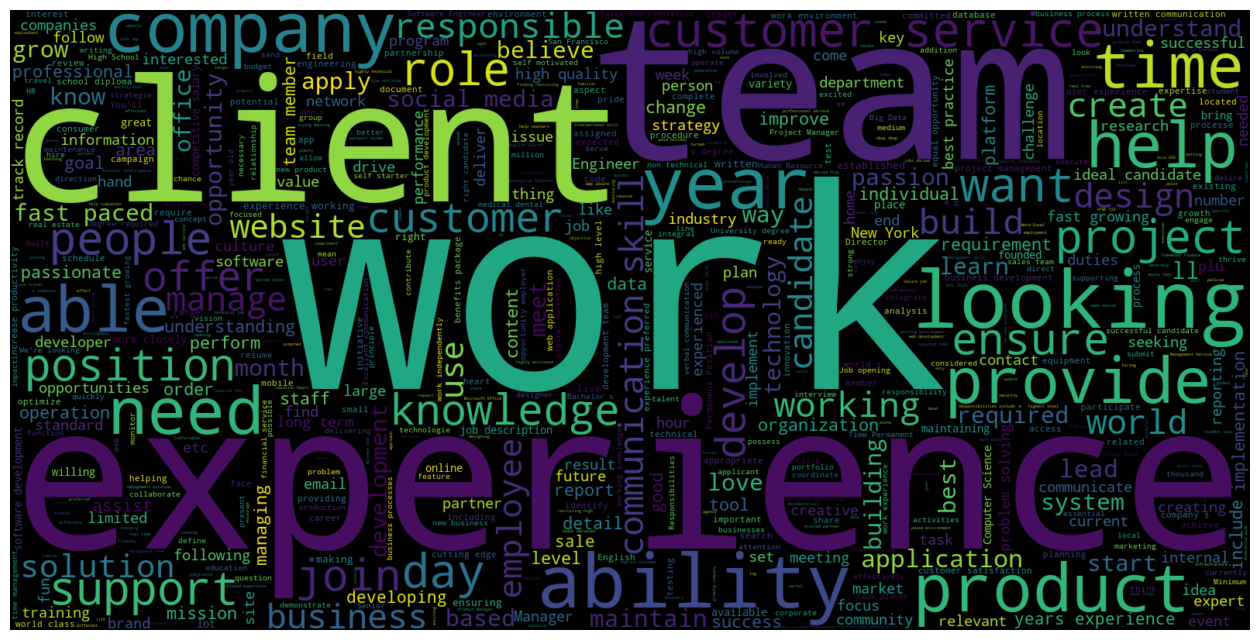

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

plt.figure(figsize=(16, 15))
wc = WordCloud(min_font_size=3, max_words=3000, width=1600, height=800, stopwords=STOPWORDS).generate(" ".join(realjobs_text))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [32]:
!pip install spacy && python -m spacy download en

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 325.1 kB/s eta 0:00:40
     --------------------------------------- 0.0/12.8 MB 326.8 kB/s eta 0:00:40
     --------------------------------------- 0.1/12.8 MB 581.0 kB/s eta 0:00:22
      --------------------------------------- 0.2/12.8 MB 1.0 MB/s eta 0:00:13
     - -------------------------------------- 0.4/12.8 MB 1.8 MB/s eta 0:00:07
     -- ------------------------------------- 0.7/12.8 MB 2.5 MB/s eta 0:00:05
     -- ------------------------------------- 0.9/12.8 MB 3.0 MB/s eta 0:00:04
     ---- ----------------------------------- 1.6/12.8 MB 4.4 MB/s eta 0:00:03
     ------- -------------------------------- 2.4/12.8 MB 6.5 MB/

In [33]:
punctuations = string.punctuation
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS
parser = English()

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens]
    
    mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations]
    
    return mytokens

class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    
    def fit(self, X, Y=None, **fit_params):
        return self
    
    def get_params(self, deep=True):
        return {}
    
def clean_text(text):
    return text.strip().lower()

In [34]:
df['text'] = df['text'].apply(clean_text)

In [35]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df['text'] contains your text data
cv = TfidfVectorizer(max_features=100)
x = cv.fit_transform(df["text"])
df1 = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())
df.drop(["text"], axis=1, inplace=True)
main_df = pd.concat((df1, df), axis=1)


In [36]:
main_df.head()


,ability,about,all,also,amp,an,and,are,as,at,...,will,with,work,working,world,years,you,your,job_id,fraudulent
0,0.000000,0.041120,0.000000,0.042424,0.036488,0.000000,0.755238,0.000000,0.078653,0.000000,...,0.000000,0.186067,0.051026,0.068029,0.000000,0.000000,0.000000,0.000000,1,0
1,0.021895,0.094183,0.035394,0.024292,0.041787,0.029771,0.490896,0.056626,0.060050,0.052431,...,0.078004,0.165735,0.043827,0.116862,0.099327,0.000000,0.204854,0.130452,2,0
2,0.000000,0.000000,0.176807,0.000000,0.041749,0.089231,0.397029,0.113149,0.000000,0.000000,...,0.062346,0.307512,0.058383,0.000000,0.000000,0.000000,0.094462,0.074476,3,0
3,0.023267,0.000000,0.018806,0.000000,0.000000,0.094909,0.695542,0.000000,0.031906,0.037144,...,0.049735,0.075480,0.046573,0.000000,0.105551,0.019806,0.050236,0.059411,4,0
4,0.000000,0.000000,0.068009,0.000000,0.040147,0.028602,0.606379,0.081605,0.115386,0.000000,...,0.000000,0.159230,0.028071,0.037425,0.000000,0.035814,0.030279,0.107427,5,0


In [37]:
Y =main_df.iloc[:,-1]
X = main_df.iloc[:,:-1]
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.3)


In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion='entropy')
model=rfc.fit(X_train,Y_train)


In [39]:
print(X_test)

        ability     about       all      also       amp        an       and  \
9550   0.000000  0.022234  0.000000  0.000000  0.000000  0.098394  0.430444   
10580  0.000000  0.000000  0.000000  0.000000  0.262969  0.000000  0.000000   
9004   0.000000  0.000000  0.035902  0.000000  0.000000  0.181188  0.426806   
5404   0.045147  0.000000  0.000000  0.000000  0.000000  0.061388  0.554320   
12656  0.058533  0.125892  0.000000  0.000000  0.055856  0.039794  0.281216   
...         ...       ...       ...       ...       ...       ...       ...   
5511   0.000000  0.000000  0.000000  0.000000  0.000000  0.093060  0.219213   
15705  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.379436   
11114  0.000000  0.000000  0.000000  0.069558  0.000000  0.085245  0.301207   
17051  0.000000  0.046924  0.000000  0.000000  0.000000  0.088994  0.605611   
4040   0.087599  0.000000  0.000000  0.048595  0.000000  0.059555  0.561149   

            are        as        at  ...       who 

In [46]:
pred = rfc.predict(X_test)
score = accuracy_score(Y_test,pred)
score

NameError: name 'accuracy_score' is not defined

# Confusion Matrix


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

pred = rfc.predict(X_test)

print("Classification Report\n")
print(classification_report(Y_test, pred))

print("Confusion Matrix\n")
print(confusion_matrix(Y_test, pred))


Classification Report

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5109
           1       0.99      0.53      0.69       255

    accuracy                           0.98      5364
   macro avg       0.98      0.76      0.84      5364
weighted avg       0.98      0.98      0.97      5364

Confusion Matrix

[[5108    1]
 [ 121  134]]
